# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="

#Cities weather data frame
Cities_DF = pd.DataFrame({"City":cities})
Cities_DF["Temperature(F)"] =""
Cities_DF["Humidity(%)"] =""
Cities_DF["Cloudiness(%)"] =""
Cities_DF["Wind Speed(mph)"] =""
Cities_DF["Latitude"]=""
Cities_DF["Longitude"]=""
Cities_DF.head()
print("Beginning Data Retrieval")
print("------------------------")

for index, row in Cities_DF.iterrows():
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    city_weather_url =response.url
    print(response.url)

    
    try:
        Cities_DF.loc[index,"Temperature(F)"]=city_weather['main']['temp']
        Cities_DF.loc[index,"Humidity(%)"]=city_weather['main']['humidity']
        Cities_DF.loc[index,"Cloudiness(%)"]=city_weather['clouds']['all']
        Cities_DF.loc[index,"Wind Speed(mph)"]=city_weather['wind']['speed']
        Cities_DF.loc[index,"Latitude"]=city_weather['coord']['lat']
        Cities_DF.loc[index,"Longitude"]=city_weather["coord"]['lon']
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

print(Cities_DF)


Beginning Data Retrieval
------------------------
Processing Record 0 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=atuona
Processing Record 1 | chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=chicama
Processing Record 2 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=vaini
Processing Record 3 | orlik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=orlik
Processing Record 4 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=hobart
Processing Record 5 | fayaoue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=fayaoue
Processing Record 6 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a

Processing Record 56 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=jamestown
Processing Record 57 | sakakah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=sakakah
City not found... skipping.
Processing Record 58 | kristianstad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=kristianstad
Processing Record 59 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=belushya%20guba
City not found... skipping.
Processing Record 60 | filadelfia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=filadelfia
Processing Record 61 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=hilo
Processing Record 62 | namibe
http://api.openweathermap.org/data

Processing Record 113 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=new%20norfolk
Processing Record 114 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=kieta
Processing Record 115 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=kudahuvadhoo
Processing Record 116 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=mys%20shmidta
City not found... skipping.
Processing Record 117 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=victoria
Processing Record 118 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=aykhal
Processing Record 119 | chambersburg
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 168 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=hithadhoo
Processing Record 169 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=bluff
Processing Record 170 | urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=urengoy
Processing Record 171 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=illoqqortoormiut
City not found... skipping.
Processing Record 172 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=umzimvubu
City not found... skipping.
Processing Record 173 | batticaloa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=batticaloa
Processing Record 174 | manokwari
http://api.openweatherma

Processing Record 222 | wasilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=wasilla
Processing Record 223 | taburao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=taburao
City not found... skipping.
Processing Record 224 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=korla
City not found... skipping.
Processing Record 225 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=saldanha
Processing Record 226 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=la%20ronge
Processing Record 227 | santa luzia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=santa%20luzia
Processing Record 228 | kaura namoda
http://api.openweathermap.org/data/2.

Processing Record 278 | baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=baykit
Processing Record 279 | miram shah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=miram%20shah
Processing Record 280 | port augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=port%20augusta
Processing Record 281 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=richards%20bay
Processing Record 282 | dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=dwarka
Processing Record 283 | juneau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=juneau
Processing Record 284 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1e

Processing Record 334 | solwezi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=solwezi
Processing Record 335 | brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=brae
Processing Record 336 | russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=russell
Processing Record 337 | taunggyi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=taunggyi
Processing Record 338 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=ahipara
Processing Record 339 | doha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=doha
Processing Record 340 | leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=leh
Processing Record

Processing Record 390 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=kununurra
Processing Record 391 | coatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=coatlan
City not found... skipping.
Processing Record 392 | qandala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=qandala
Processing Record 393 | carhuamayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=carhuamayo
Processing Record 394 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=cherskiy
Processing Record 395 | oussouye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=oussouye
Processing Record 396 | cameta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5

Processing Record 444 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=huarmey
Processing Record 445 | mizdah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=mizdah
Processing Record 446 | sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=sangar
Processing Record 447 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=mount%20isa
Processing Record 448 | karaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=karaul
City not found... skipping.
Processing Record 449 | alotau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=alotau
City not found... skipping.
Processing Record 450 | huanren
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 500 | marystown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=marystown
Processing Record 501 | handia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=handia
Processing Record 502 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=karratha
Processing Record 503 | ternate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=ternate
Processing Record 504 | ladario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=ladario
Processing Record 505 | tornio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=tornio
Processing Record 506 | sharjah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=sharj

Processing Record 556 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=bolungarvik
City not found... skipping.
Processing Record 557 | tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=tromso
Processing Record 558 | tigil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=tigil
Processing Record 559 | porto novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=porto%20novo
Processing Record 560 | sydney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=sydney
Processing Record 561 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1051a26285a4c6063cac9c8da&q=ixtapa
Processing Record 562 | samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55ad1ef1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
Cities_DF.dropna(axis=0, inplace=True)

Cities_DF.to_csv('city_data_output.csv')
Cities_DF.head()

,City,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph),Latitude,Longitude
0,atuona,83.39,77,23,12.41,-9.8,-139.03
1,chicama,68,88,90,5.82,-7.84,-79.15
2,vaini,95,16,0,6.93,15.34,74.49
3,orlik,36.95,69,93,9.75,52.51,99.83
4,hobart,49.87,58,75,12.75,-42.88,147.33


In [8]:
# Latitude vs Weather DFs

Temperature_DF = Cities_DF[["Latitude", "Temperature(F)"]]
Humidity_DF = Cities_DF[["Latitude", "Humidity(%)"]]
Cloudiness_DF = Cities_DF[["Latitude", "Cloudiness(%)"]]
WindSpeed_DF = Cities_DF[["Latitude", "Wind Speed(mph)"]]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
# Latitude vs. Temp DF 
Temperature_DF.head()

,Latitude,Temperature(F)
0,-9.80,83.39
1,-7.84,68.00
2,15.34,95.00
3,52.51,36.95
4,-42.88,49.87


#### Latitude vs. Temperature Plot

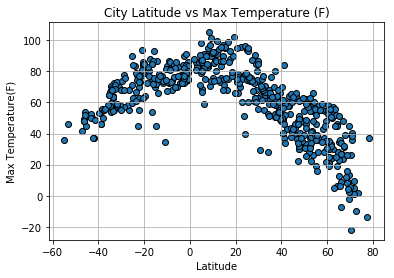

<Figure size 432x288 with 0 Axes>

In [10]:
# Latitude vs Temperature Plot
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()

plt.scatter(Cities_DF["Latitude"], Cities_DF["Temperature(F)"], edgecolors="black")

plt.show()
plt.savefig("./Images/temperature.png")


#### Latitude vs. Humidity Plot

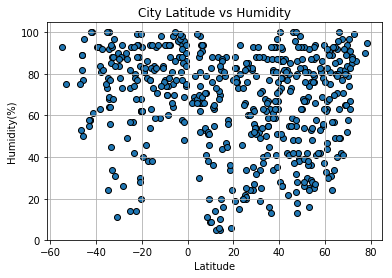

<Figure size 432x288 with 0 Axes>

In [11]:
# Latitude vs Humidity Plot
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.scatter(Cities_DF["Latitude"], Cities_DF["Humidity(%)"], edgecolors="black")

plt.show()
plt.savefig("./Images/Humidity.png")



#### Latitude vs. Cloudiness Plot

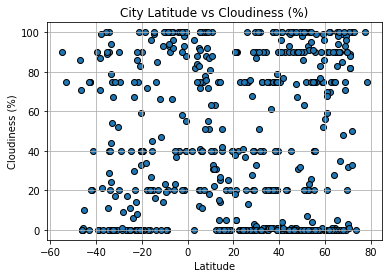

<Figure size 432x288 with 0 Axes>

In [12]:
plt.title("City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.scatter(Cities_DF["Latitude"], Cities_DF["Cloudiness(%)"], edgecolors="black")

plt.show()
plt.savefig("./Images/Cloudiness.png")


#### Latitude vs. Wind Speed Plot

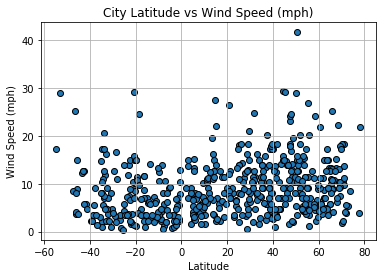

<Figure size 432x288 with 0 Axes>

In [13]:
plt.title("City Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.scatter(Cities_DF["Latitude"], Cities_DF["Wind Speed(mph)"], edgecolors="black")

plt.show()
plt.savefig("./Images/Wind Speed.png")

